In [ ]:
import time
import struct
import filecmp
import matplotlib.pyplot as plt

In [ ]:
####### OBS: PARA TROCAR DO ARQUIVO DE TEXTO PARA O ARQUIVO DE VÍDEO, BASTA COMENTAR A LINHA REFERENTE À QUAL DELES NÃO IRÁ UTILIZAR NOS BLOCOS DE CÓDIGO QUE OS UTILIZAM #######

f = open("corpus16MB.txt", "rb").read()
#f = open("disco.mp4", "rb").read()

f = f.decode('ISO-8859-1')

Compressor

In [ ]:
k = []
exe_time = []
flag = []

for K in range(9,17):
  start = time.time()
  dic = {}
  new_index = 256
  compressed_f = []
  last = ''
  overflow = 0

  for i in range(256):
      dic[i.to_bytes(1, 'big')] = i

  for character in f:
      value = last + character
      
      if value.encode('ISO-8859-1') not in dic: 
          if len(dic) < 2**K:
              dic[value.encode('ISO-8859-1')] = new_index
              new_index += 1
          else:
              overflow = 1
          cod = dic[last.encode('ISO-8859-1')]
          compressed_f.append(cod)
          last = character

      else:
          last = value

  cod = dic[last.encode('ISO-8859-1')]
  compressed_f.append(cod)

  f_out = open("txtComprimido" + str(K) + ".txt" , "wb")
  #f_out = open("mp4Comprimido" + str(K) + ".txt" , "wb")
  
  for i in compressed_f:
      f_out.write(struct.pack('H', i))
    
  f_out.close()

  k.append(K)

  flag.append(overflow)

  end = time.time()

  exe_time.append(end-start)

  print('K = %d  ||  Tempo = %.2f segundos\n' %(K,end-start))

K = 9  ||  Tempo = 20.27 segundos

K = 10  ||  Tempo = 18.17 segundos

K = 11  ||  Tempo = 17.06 segundos

K = 12  ||  Tempo = 16.10 segundos

K = 13  ||  Tempo = 15.70 segundos

K = 14  ||  Tempo = 15.62 segundos

K = 15  ||  Tempo = 16.37 segundos

K = 16  ||  Tempo = 16.71 segundos



In [ ]:
for i in range(len(flag)):
  if flag[i] == 1:
    print('K = %d  estourou' %(i+9))
  

K = 9  estourou
K = 10  estourou
K = 11  estourou
K = 12  estourou
K = 13  estourou
K = 14  estourou
K = 15  estourou
K = 16  estourou


In [ ]:
rc = []

for i in range(9,17):
  #f2 = open("txtComprimido" + str(i) + ".txt" , "rb").read()
  f2 = open("mp4Comprimido" + str(i) + ".txt" , "rb").read()
  rc.append(len(f)/len(f2))
  print('K = %d  ||  Tamanho = %.2f MB -> %.2f MB  ||  Rc = %.2f\n' %(i,len(f)/1048000,len(f2)/1048000, len(f)/len(f2) ))



K = 9  ||  Tamanho = 2.01 MB -> 4.00 MB  ||  Rc = 0.50

K = 10  ||  Tamanho = 2.01 MB -> 3.99 MB  ||  Rc = 0.50

K = 11  ||  Tamanho = 2.01 MB -> 3.97 MB  ||  Rc = 0.51

K = 12  ||  Tamanho = 2.01 MB -> 3.95 MB  ||  Rc = 0.51

K = 13  ||  Tamanho = 2.01 MB -> 3.74 MB  ||  Rc = 0.54

K = 14  ||  Tamanho = 2.01 MB -> 3.38 MB  ||  Rc = 0.60

K = 15  ||  Tamanho = 2.01 MB -> 2.90 MB  ||  Rc = 0.69

K = 16  ||  Tamanho = 2.01 MB -> 2.46 MB  ||  Rc = 0.82



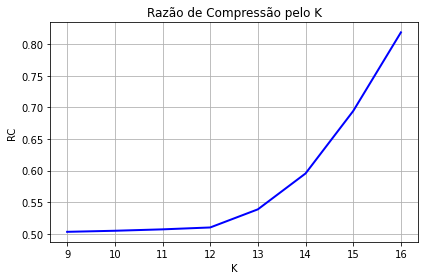

In [ ]:
# Gráfico da razao de compressão X K 
fig, ax = plt.subplots()
ax.plot(k, rc, 'b', linewidth=2, markersize=8)
ax.set(xlabel='K', ylabel='RC', title='Razão de Compressão pelo K')
ax.grid()

plt.tight_layout()
plt.show()

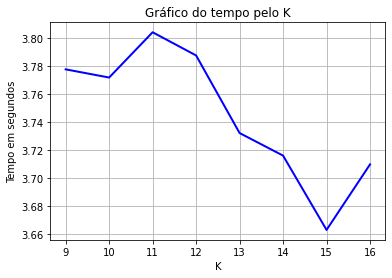

In [ ]:
# Gerando gráfico Tempo X K
fig, bx = plt.subplots()
bx.plot(k, exe_time, 'b', linewidth=2, markersize=8)
bx.set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
bx.grid()
plt.show()

Descompressor

In [ ]:
exe_time = []

for K in range(9,17):

    start = time.time()

    #f_decompress = open("txtComprimido" + str(K) + ".txt", "rb").read()
    f_decompress = open("mp4Comprimido" + str(K) + ".txt", "rb").read()

    compressed = []
    new_index = 256
    decompressed = ''
    dic = {}
    
    for i in range(0,len(f_decompress),2):
        byte_array = bytearray([f_decompress[i],f_decompress[i+1]])
        compressed.append(struct.unpack('H', byte_array)[0])

    for i in range(256):
        dic[i] = chr(i)  

    for i in compressed:
        if len(dic) <= 2**K:
            if new_index > 256:   
                dic[new_index-1] += dic[i][0]
        decompressed += dic[i]
        dic[new_index] = dic[i]  
        new_index += 1

    #f_out = open("txtDescomprimido" + str(K) + ".txt" , "wb")
    f_out = open("mp4Descomprimido" + str(K) + ".mp4" , "wb")

    for i in decompressed:
        f_out.write(struct.pack('B', ord(i)))
    
    f_out.close()

    end = time.time()

    exe_time.append(end-start)
    
    print('K = %d  ||  Tempo = %.2f segundos\n' %(K,end-start))

K = 9  ||  Tempo = 4.76 segundos

K = 10  ||  Tempo = 4.71 segundos

K = 11  ||  Tempo = 4.69 segundos

K = 12  ||  Tempo = 4.59 segundos

K = 13  ||  Tempo = 4.57 segundos

K = 14  ||  Tempo = 4.30 segundos

K = 15  ||  Tempo = 4.14 segundos

K = 16  ||  Tempo = 3.78 segundos



In [ ]:
for i in range(9,17):
  #equal = filecmp.cmp('corpus16MB.txt', 'txtDescomprimido' + str(i) + '.txt')
  equal = filecmp.cmp('disco.mp4', 'mp4Descomprimido' + str(i) + '.mp4')
  print('K = %d  ||  %s\n'%(i,equal))

K = 9  ||  True

K = 10  ||  True

K = 11  ||  True

K = 12  ||  True

K = 13  ||  True

K = 14  ||  True

K = 15  ||  True

K = 16  ||  True



In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('mp4Descomprimido9.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)